<a href="https://colab.research.google.com/github/ImaanZahra/House-Prediction-Project-/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv(r"/content/Housing 2.csv")

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


## Check for missing values:

In [ ]:
# Check for missing values
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


## Convert Categorical Variables to Numerical

In [ ]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
ab=['furnishingstatus']
df[ab] = df[ab].apply(lambda x: x.map({'unfurnished': 2, 'furnished': 1, 'semi-furnished': 0}))
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler
scaler = MinMaxScaler()

# Normalize numerical columns
num_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus']
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0.5
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0.5
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,0.0
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0.5
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0.5


In [ ]:
# correlation matrix to identify important features
correlation_matrix = df.corr()
print(correlation_matrix)

                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  

In [ ]:
# Select columns that are closely related
threshold = 0.5
close_relations = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]
print("\nColumns that are closely related:\n", close_relations)


Columns that are closely related:
                      price      area  bedrooms  bathrooms  stories  mainroad  \
price             1.000000  0.535997       NaN   0.517545      NaN       NaN   
area              0.535997  1.000000       NaN        NaN      NaN       NaN   
bedrooms               NaN       NaN       1.0        NaN      NaN       NaN   
bathrooms         0.517545       NaN       NaN   1.000000      NaN       NaN   
stories                NaN       NaN       NaN        NaN      1.0       NaN   
mainroad               NaN       NaN       NaN        NaN      NaN       1.0   
guestroom              NaN       NaN       NaN        NaN      NaN       NaN   
basement               NaN       NaN       NaN        NaN      NaN       NaN   
hotwaterheating        NaN       NaN       NaN        NaN      NaN       NaN   
airconditioning        NaN       NaN       NaN        NaN      NaN       NaN   
parking                NaN       NaN       NaN        NaN      NaN       NaN   
pref

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.013101390609742835
R-squared (R²): 0.6542221839581828


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression Mean Squared Error (MSE): {mse_ridge}")
print(f"Ridge Regression R-squared (R²): {r2_ridge}")

Ridge Regression Mean Squared Error (MSE): 0.013105570185978917
Ridge Regression R-squared (R²): 0.6541118746951479


In [ ]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms'] + df['stories']


In [ ]:
df['house_age'] = 2024 - (1980 + df['stories']*5)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms,house_age
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0.5,1.600000,40.666667
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0.5,2.600000,39.000000
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,0.0,1.066667,42.333333
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0.5,1.266667,42.333333
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0.5,0.933333,42.333333


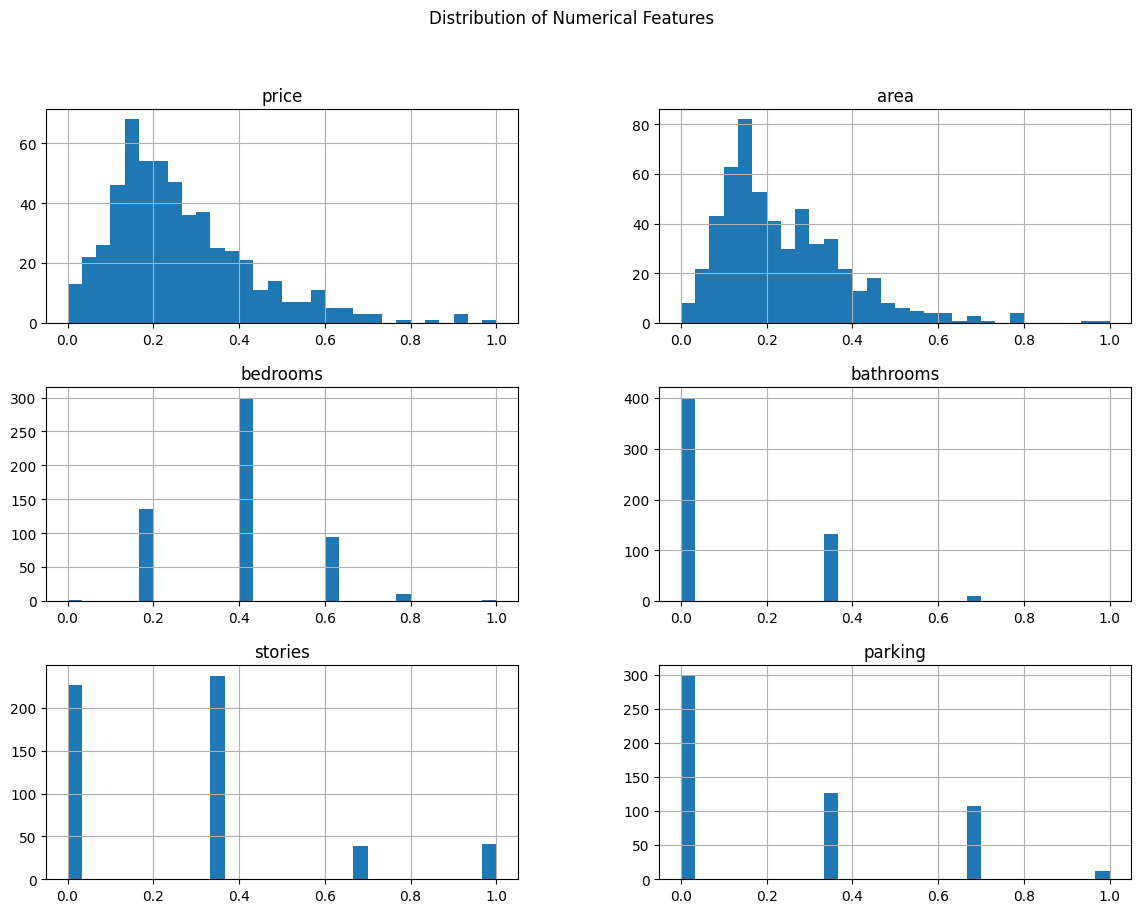

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot histograms for numerical features
df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']].hist(figsize=(14, 10), bins=30)
plt.suptitle('Distribution of Numerical Features')
plt.show()

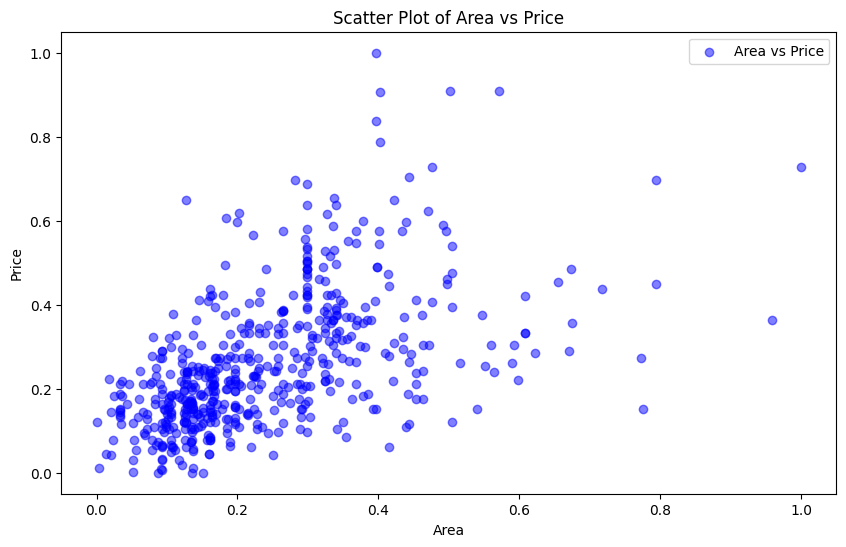

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], alpha=0.5, c='blue', label='Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Area vs Price')
plt.legend()
plt.show()

<Figure size 1400x1000 with 0 Axes>

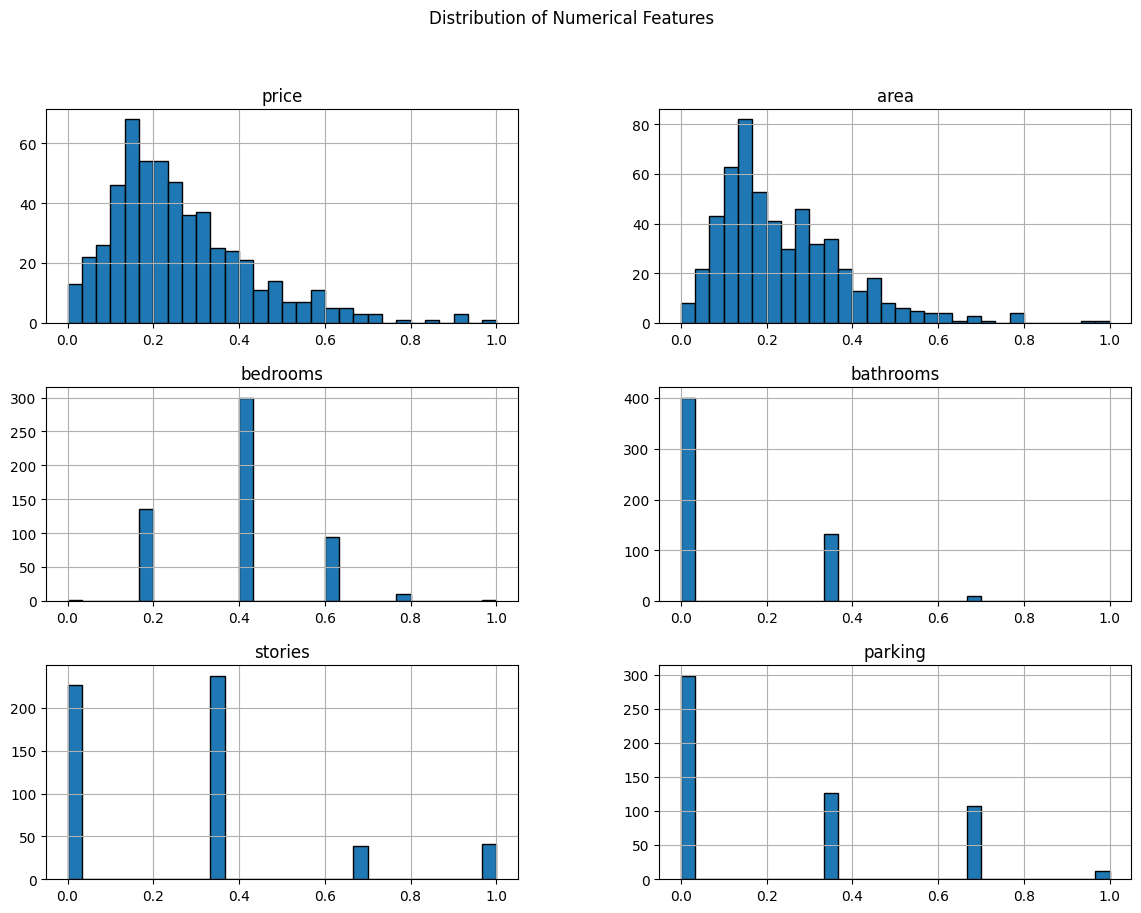

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
plt.figure(figsize=(14, 10))
df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']].hist(bins=30, edgecolor='black', figsize=(14, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()


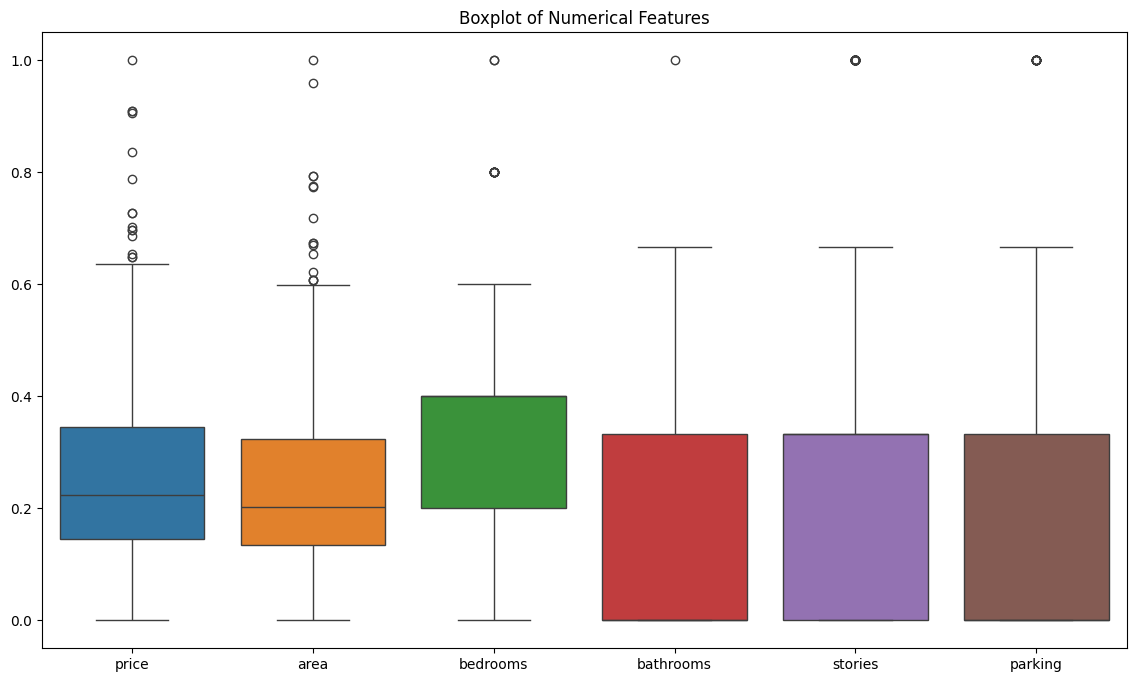

In [ ]:
import seaborn as sns

# Boxplot for numerical features
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
plt.title('Boxplot of Numerical Features')
plt.show()